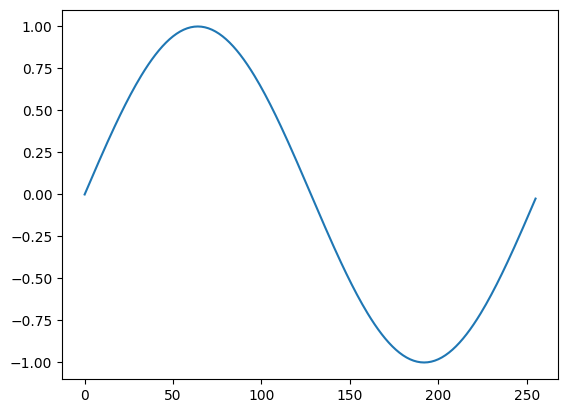

In [1]:
from src.grid.make_periodic_grid import make_periodic_grid
import params.PARAMS_ion_acoustic_waves as params
import jax.numpy as jnp
from src.vPoisson import vPoisson
import matplotlib.pyplot as plt

#jnp.set_printoptions(threshold=jnp.inf)

charge = params.charge
Ns = params.Ns
Lx = params.Lx
Lv_s = params.Lv_s
Nx = params.Nx
Nv = params.Nv
finis = params.fini

# Initialize grids and distribution functions
grids = []
for s in range(Ns):
    grid = make_periodic_grid(Lx, Lv_s[s], Nx, Nv)
    grid_methode = "spline"
    grids.append(grid)
    
fs = jnp.zeros((Nx, Nv, Ns))
for s in range(Ns):
    fini = finis[s]                                                  #access the distribution function in the params for the s-th species
    fs = fs.at[:, :, s].set(fini(grids[s]['X'], grids[s]['V']).T)
    
test = vPoisson(fs, grids, charge)
#print(test)
plt.plot(test)